In [1]:
import bz2
import pandas as pd
import re 
import numpy as np

In [29]:
#Import Dataset
train_file = bz2.BZ2File('../data/train.ft.txt.bz2')
test_file = bz2.BZ2File('../data/test.ft.txt.bz2')

In [31]:
#Reading Data set
train_file = train_file.readlines()
test_file = test_file.readlines()

In [32]:
#training on the first 10000 reviews in the  dataset
num_train = 100000
#Using 2000 reviews from test set
num_test = 20000#Using 200,000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [33]:
#Extracing Labels and Review from traing Dataset
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

In [34]:
#Extracing Labels and Review from test Dataset
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

In [35]:
train = pd.DataFrame({'text':train_sentences,'label':train_labels})
test = pd.DataFrame({'text':test_sentences,'label':test_labels})

In [8]:
train.head()

,text,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [9]:
train.describe()

,label
count,100000.000000
mean,0.512670
std,0.499842
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
train['number_of_words'] = train['text'].str.lower().str.split().apply(len)
train.head()

,text,label,number_of_words
0,stuning even for the non-gamer: this sound tra...,1,80
1,the best soundtrack ever to anything.: i'm rea...,1,97
2,amazing!: this soundtrack is my favorite music...,1,129
3,excellent soundtrack: i truly like this soundt...,1,118
4,"remember, pull your jaw off the floor after he...",1,87


In [9]:
test['number_of_words'] = test['text'].str.lower().str.split().apply(len)
test.head()

,text,label,number_of_words
0,great cd: my lovely pat has one of the great v...,1,106
1,one of the best game music soundtracks - for a...,1,148
2,batteries died within a year ...: i bought thi...,0,60
3,"works fine, but maha energy is better: check o...",1,37
4,great for the non-audiophile: reviewed quite a...,1,69


<AxesSubplot:xlabel='label', ylabel='count'>

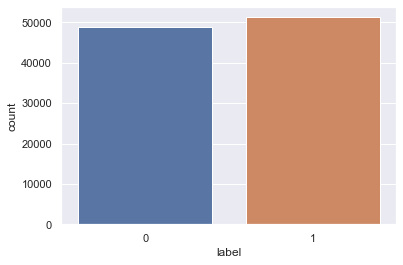

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=train)

<AxesSubplot:ylabel='Frequency'>

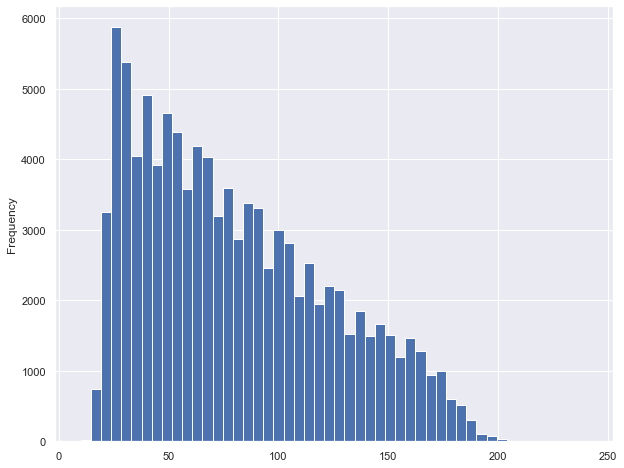

In [13]:
train['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

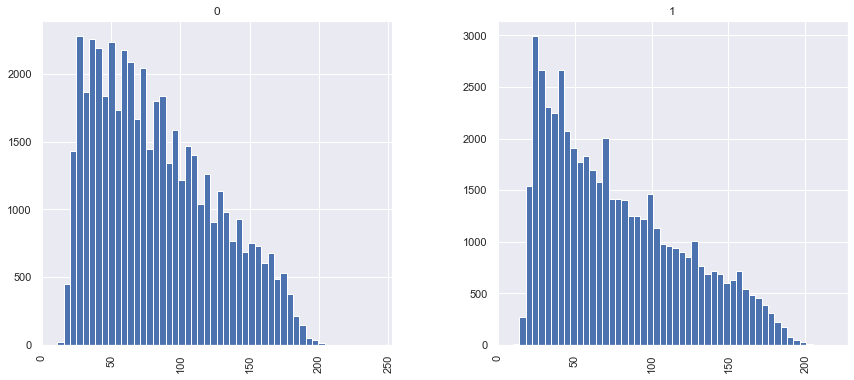

In [14]:
train.hist(column='number_of_words', by='label',
           bins=50,figsize=(14,6))

In [36]:
import re

import nltk

def remove_url(text):
     url=re.compile(r"https?://\S+|www\.\S+")
     return url.sub(r" ",text)

def remove_html(text):
  cleanr = re.compile('<.*?>')
  return cleanr.sub(r" ",text)



def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output


import string
def remove_punc(text):
   table=str.maketrans(' ',' ',string.punctuation)
   return text.translate(table)



nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
 
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
train['text']=train.text.map(lambda x:remove_url(x))
train['text']=train.text.map(lambda x:remove_html(x))
train['text']=train.text.map(lambda x:remove_punc(x))
train['text']=train['text'].map(remove_num)
train['text']=train['text'].map(remove_stopword)

In [38]:
test['text']=test.text.map(lambda x:remove_url(x))
test['text']=test.text.map(lambda x:remove_html(x))
test['text']=test.text.map(lambda x:remove_punc(x))
test['text']=test['text'].map(remove_num)
test['text']=test['text'].map(remove_stopword)

In [11]:
import nltk

def Stemming(text):
   stem=[]
   from nltk.corpus import stopwords
   from nltk.stem import SnowballStemmer
  #is based on The Porter Stemming Algorithm
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [12]:
train['text']=train['text'].map(Stemming)
test['text']=test['text'].map(Stemming)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/apple/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [39]:
import tensorflow as tf
max_length=100
vocab_size=12000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train['text'])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test['text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [44]:
train['text'][0]

'goes real life reason gave enjoyed fat girl itif want story real life pick coldest winter ever'

In [41]:
training_sequences[0]

[360,
 105,
 79,
 301,
 243,
 274,
 2000,
 559,
 5201,
 48,
 44,
 105,
 79,
 561,
 1,
 1666,
 60]

In [25]:
training_padded[1]

array([  19,  800,   34,  159,   33,   53,   82,  149,  626,   19,  123,
        800, 1499,  271,  368,  161, 2603,  151,    1,    1,    1, 1696,
        742,   43, 1631,   33,  424,   55, 1063,  276, 5409,    1,  119,
       4143,  138,    1,   80,   62,   85,   22,   24,   15,   58,    3,
        133,    9,   76,   69, 2432,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [26]:
print(training_sequences[0])

[1, 16, 1, 97, 380, 248, 6004, 1, 321, 18, 9, 1454, 16, 47, 514, 1, 123, 43, 413, 123, 1, 1772, 640, 34, 413, 19, 43, 6768, 156, 3666, 1, 311, 1, 1108, 8225, 2998, 3589, 1, 9, 4395, 95, 2089, 221]


In [53]:
print(train['text'][1])

best soundtrack ever anything im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM,GRU
from keras.preprocessing import sequence
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [35]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

2022-10-18 13:53:21.935627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           768000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 512)              657408    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 1,425,921
Trainable params: 1,425,921
Non-

In [36]:
adam=Adam(lr=0.0001)

/usr/local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )

In [38]:
history=model.fit(training_padded,train['label'], epochs=15, batch_size=256,verbose = 1,callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)],validation_data=(testing_padded,test['label']))

Epoch 1/15
391/391 [==============================] - 1028s 3s/step - loss: 0.5249 - accuracy: 0.7275 - val_loss: 0.3675 - val_accuracy: 0.8510
Epoch 2/15
391/391 [==============================] - 707s 2s/step - loss: 0.3384 - accuracy: 0.8598 - val_loss: 0.3232 - val_accuracy: 0.8665
Epoch 3/15
391/391 [==============================] - 678s 2s/step - loss: 0.2914 - accuracy: 0.8821 - val_loss: 0.2973 - val_accuracy: 0.8767
Epoch 4/15
391/391 [==============================] - 735s 2s/step - loss: 0.2647 - accuracy: 0.8940 - val_loss: 0.2887 - val_accuracy: 0.8812
Epoch 5/15
391/391 [==============================] - 718s 2s/step - loss: 0.2480 - accuracy: 0.9006 - val_loss: 0.2788 - val_accuracy: 0.8856
Epoch 6/15
391/391 [==============================] - 730s 2s/step - loss: 0.2367 - accuracy: 0.9061 - val_loss: 0.2759 - val_accuracy: 0.8874
Epoch 7/15
391/391 [==============================] - 772s 2s/step - loss: 0.2265 - accuracy: 0.9105 - val_loss: 0.2742 - val_accuracy: 0.887

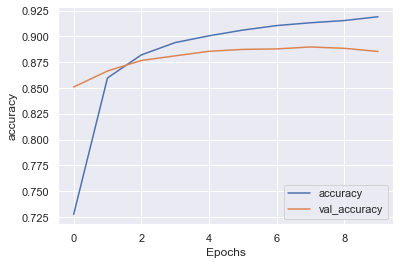

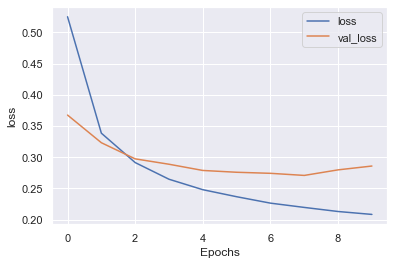

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
import pickle
pickle.dump(model, open('model/lstm_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://cfa151cc-2424-4f16-8b5a-79955b959dcb/assets


INFO:tensorflow:Assets written to: ram://cfa151cc-2424-4f16-8b5a-79955b959dcb/assets


In [26]:
import pickle
import numpy as np

m = pickle.load(open('model/lstm_model.pkl', "rb"))
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

def Review(sentence,m):
   sequences = tokenizer.texts_to_sequences(sentence)
   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

   prob=m.predict(padded)
   print(prob)
   if prob>=0.8:
     print(5)
   elif prob>=0.6:
     print(4)
   elif prob>=0.4:
     print(3) 
   elif prob>=0.2:
     print(2)   
   else:
       print(1)

In [27]:
sentence=['Good Product + exactly in size']
Review(sentence,m)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [47]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded
y_test=test['label']

625/625 [==============================] - 90s 141ms/step


In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.885450
Precision: 0.887054
Recall: 0.888878
F1 score: 0.887965
ROC AUC: 0.885375
[[8630 1156]
 [1135 9079]]


In [50]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9786
           1       0.89      0.89      0.89     10214

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



<AxesSubplot:>

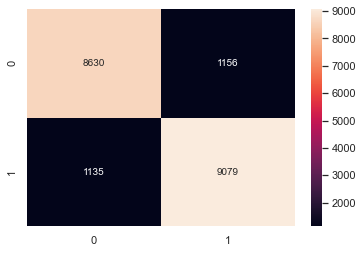

In [51]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

In [15]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]


In [32]:
train_reviews = train['text'].values.tolist()
train_labels = train['label'].tolist()

test_reviews = test['text'].values.tolist()
test_labels = test['label'].tolist()

In [27]:
from sklearn.model_selection import train_test_split
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 3.84kB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 983kB/s] 
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 1.17MB/s]


In [21]:
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(train_reviews, train_labels, test_size=.2)


NameError: name 'train_test_split' is not defined

In [20]:
train_encodings = tokenizer(train_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(test_sentences,
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            train_labels
                            ))
val_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(val_encodings),
                            test_labels
                            ))

TypeError: 'Tokenizer' object is not callable

In [17]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)


2022-10-19 22:49:45.765236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceCla

In [51]:
train_dataset[0]

TypeError: 'TensorSliceDataset' object is not subscriptable

In [52]:
train_dataset.shuffle(100).batch(16)

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 374), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 374), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
val_dataset.shuffle(100).batch(16)

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 318), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 318), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
train['label']

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    0
99997    0
99998    0
99999    0
Name: label, Length: 100000, dtype: int64

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])
print("Fit model on training data")
model.fit(x = training_padded, y = train['label'],
          epochs=2,
          batch_size=16,
          validation_data=(testing_padded,test['label']))

Fit model on training data
Epoch 1/2
2769/6250 [============>.................] - ETA: 11:49:15 - loss: 0.6933 - accuracy: 0.5114

KeyboardInterrupt: 

In [ ]:
model.save_pretrained("./sentiment")
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")

In [ ]:
test_sentence = "This is a really good product. I love it"
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

In [ ]:
tf_output = loaded_model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])